In [2]:
import numpy as np
from sklearn.datasets import make_blobs, make_circles
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

# Примеры использования метода t-SNE

Генерация выборки размера 500 из пяти "облаков" (гауссовских выборок) в 10-мерном пространстве.

In [6]:
X, y = make_blobs(n_samples=500, n_features=10, centers=5)
y

array([0, 4, 4, 0, 3, 1, 3, 4, 0, 0, 1, 2, 0, 3, 2, 2, 4, 0, 3, 3, 1, 1, 4,
       3, 2, 4, 4, 2, 1, 4, 1, 2, 2, 0, 2, 3, 3, 3, 0, 2, 1, 4, 2, 3, 2, 4,
       2, 1, 4, 2, 4, 2, 1, 1, 2, 0, 3, 1, 1, 0, 4, 2, 1, 4, 1, 1, 2, 3, 4,
       1, 4, 4, 0, 1, 3, 2, 1, 1, 1, 3, 3, 4, 0, 2, 4, 3, 0, 4, 3, 2, 4, 3,
       3, 4, 2, 1, 4, 3, 1, 1, 3, 1, 2, 0, 0, 0, 2, 1, 0, 4, 3, 2, 3, 3, 0,
       1, 2, 1, 0, 0, 2, 0, 0, 1, 3, 2, 2, 2, 4, 2, 3, 2, 4, 2, 1, 4, 3, 3,
       1, 2, 0, 3, 2, 0, 3, 2, 3, 2, 3, 2, 0, 2, 1, 4, 2, 1, 2, 3, 0, 2, 2,
       2, 2, 3, 4, 1, 0, 3, 4, 1, 0, 3, 3, 3, 4, 2, 3, 2, 4, 0, 1, 0, 4, 3,
       2, 3, 4, 0, 3, 4, 3, 2, 1, 1, 2, 0, 2, 3, 1, 2, 3, 1, 0, 0, 2, 1, 1,
       2, 3, 4, 1, 4, 2, 3, 3, 4, 4, 3, 0, 2, 1, 4, 3, 3, 1, 1, 2, 4, 4, 0,
       3, 0, 0, 4, 1, 0, 1, 4, 3, 3, 4, 2, 3, 0, 2, 4, 4, 0, 2, 0, 1, 4, 1,
       0, 1, 2, 4, 1, 3, 3, 2, 0, 1, 0, 0, 0, 2, 0, 4, 2, 1, 1, 2, 0, 3, 4,
       3, 3, 2, 1, 4, 1, 0, 0, 0, 3, 1, 1, 3, 3, 4, 4, 3, 0, 4, 4, 1, 3, 4,
       0, 3,

Простое применение t-SNE для сжатия в пространство размерности 2.

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


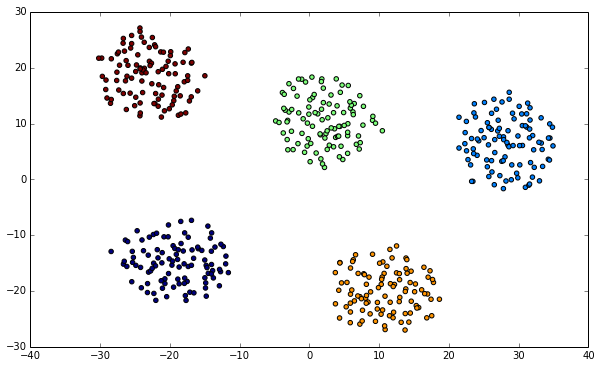

In [7]:
tsne = TSNE(n_components=2)
X_hat = tsne.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(X_hat[:, 0], X_hat[:, 1], c=y)
plt.show()

А вот так можно вызывать справку. Она откроется в отдельном окне

In [ ]:
?TSNE

Посмотрим, как меняется расположение точек в двумерном пространстве в зависимости от значения перплексии (сглаженный показатель эффективного числа соседей).

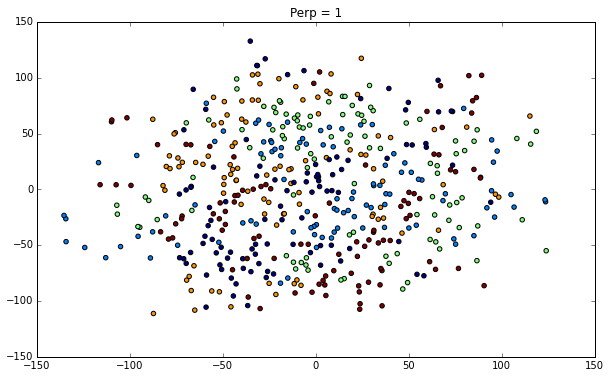

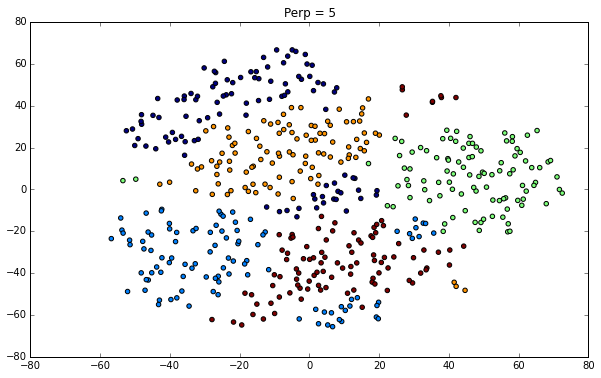

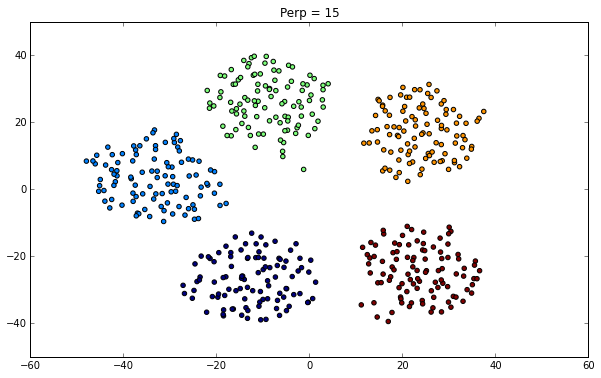

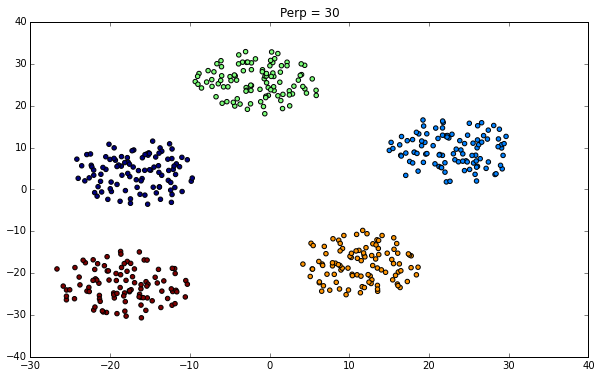

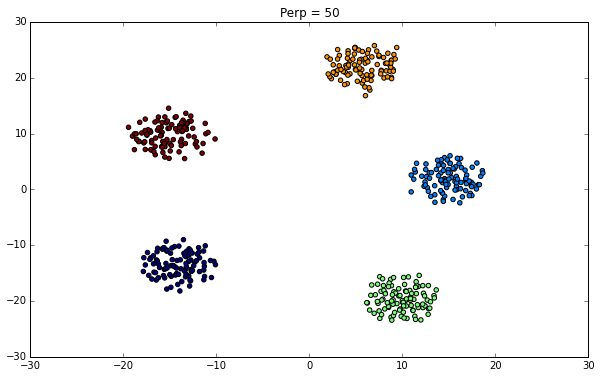

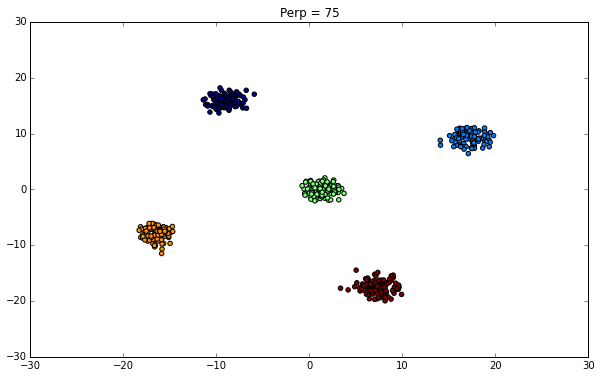

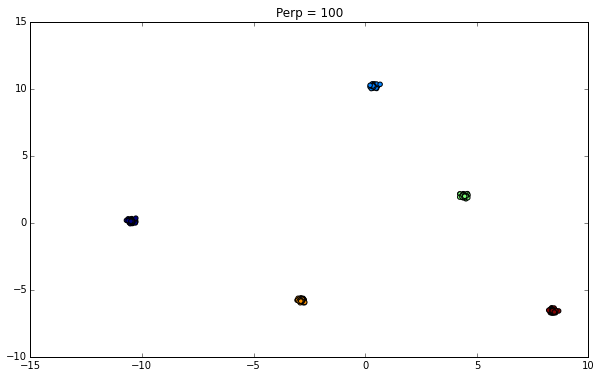

In [18]:
for perplexity in [1, 5, 15, 30, 50, 75, 100]:

    tsne = TSNE(n_components=2, perplexity=perplexity)
    X_hat = tsne.fit_transform(X)

    plt.figure(figsize=(10, 6))
    plt.scatter(X_hat[:, 0], X_hat[:, 1], c=y)
    plt.title('Perp = {}'.format(perplexity))
    plt.show()

Как видим, чем меньше перплексия, тем более картинка получается размытой.
Это происходит из-за того, что с уменьшением перплексии уменьшаются величины $\sigma_i$, отвечающие за дисперсию.
При малом значении перплексии на расположение точки в маломерном пространстве влияют только самые ближайшие соседи.

Если же увеличить дисперсию "облаков", то картинка станет хуже при том же значении перплексии (30).

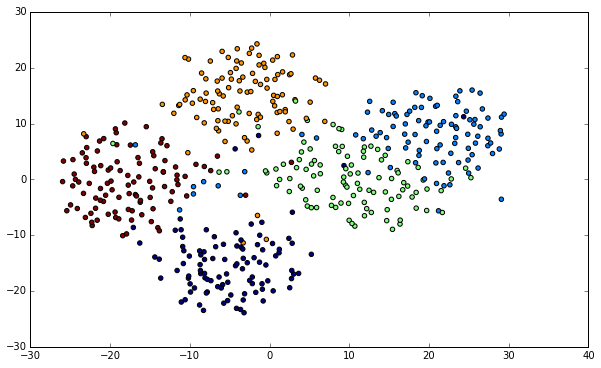

In [31]:
X, y = make_blobs(n_samples=500, n_features=10, centers=5, cluster_std=5)

tsne = TSNE(n_components=2)
X_hat = tsne.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(X_hat[:, 0], X_hat[:, 1], c=y)
plt.show()

## MNIST
Загрузим часть обычного MNIST'а

In [4]:
N = 7000
X = np.zeros((N, 28 * 28))
with open('train.txt') as file_train:
    for i in range(N):
        X[i] = np.array(file_train.readline().split(' ')).astype(int)

labels = np.loadtxt('train_labels.txt')[:N]

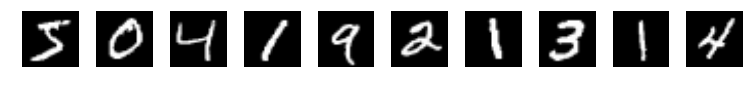

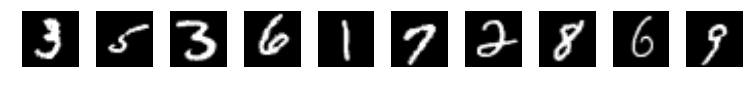

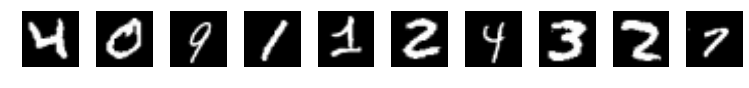

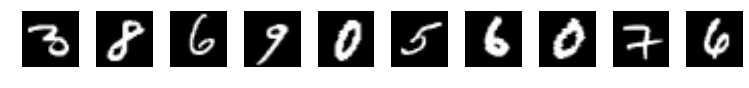

In [5]:
for i in range(4):
    plt.figure(figsize=(13, 1))
    
    for j in range(10):
        plt.subplot(1, 10, j + 1)
        plt.imshow(X[i * 10 + j].reshape((28, 28)), cmap='gray')
        plt.axis('off')
    
    plt.show()

Применим к нему сначала PCA для сжатия в пространство размерности 30, а затем t-SNE для сжатия в двумерное пространство.

In [6]:
%%time
pca = PCA(n_components=30)
X_hat = pca.fit_transform(X)

CPU times: user 6.16 s, sys: 56.2 ms, total: 6.22 s
Wall time: 6.17 s


In [7]:
%%time
tsne = TSNE(n_components=2, perplexity=40)
X_hat_hat = tsne.fit_transform(X_hat)

CPU times: user 3min 30s, sys: 13.2 s, total: 3min 43s
Wall time: 3min 43s


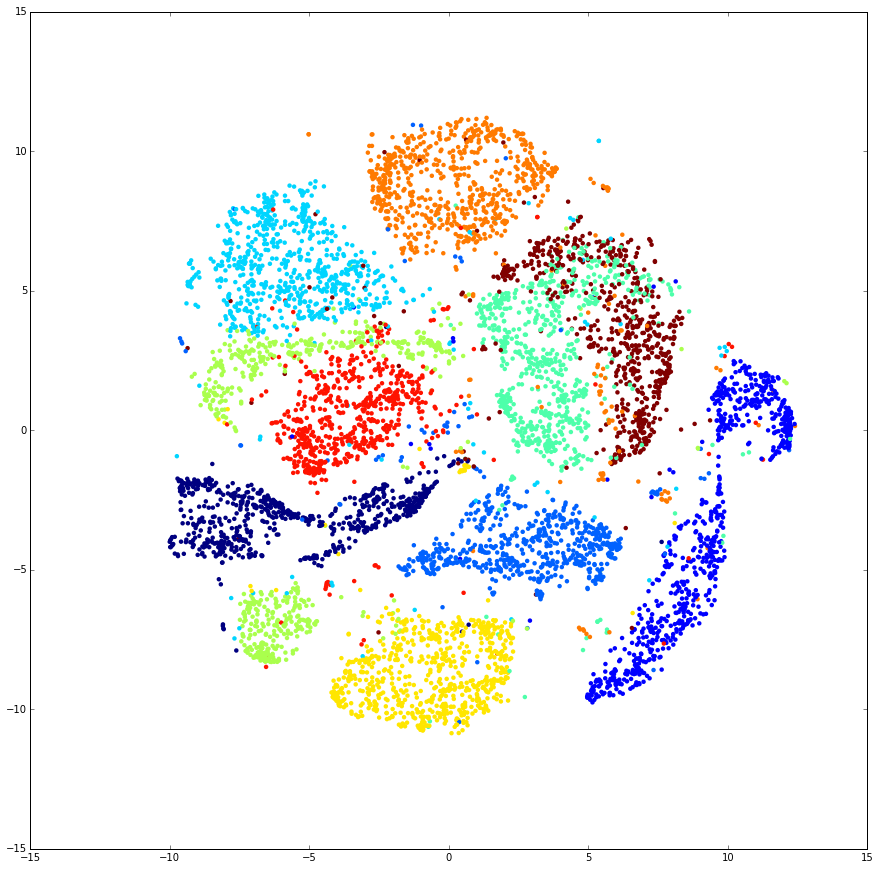

In [9]:
plt.figure(figsize=(15, 15))
plt.scatter(X_hat_hat[:, 0], X_hat_hat[:, 1], c=labels, linewidths=0)
plt.show()